In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['font.sans-serif']=['Simhei']  #显示中文
plt.rcParams['axes.unicode_minus']=False    #显示负号  

from scipy.optimize import curve_fit
# rng = np.random.default_rng()
import os
# path='pic' #创建图片文件
# os.makedirs(path,exist_ok=True) 

# 规范化不确定度

In [3]:
def string_result(x,dx,latex=False):
    #返回类型位字符串，latex变量选择是否返回LaTeX源码
    order_x=np.floor(np.log10(abs(x)))
    order_dx=np.floor(np.log10(abs(dx)))
    value_x=x/10**order_x
    value_dx=dx/10**order_dx
    delord=order_x-order_dx
    # print(delord)
    if delord>=0:
        two_number=0
        # print(value_dx)
        if (value_dx<2):
            two_number=1
        
        value_dx=value_dx*10**(-delord)
        # order_x=log(x)/log(10)
        delord+=two_number
        value_x_show=f"{value_x:.{int(delord)}f}"
        value_dx_show=f"{value_dx:.{int(delord)}f}"
    else :
        delord = abs(delord)
        value_x = value_x*10**(-delord)
        value_x_show=f"{value_x:.{int(delord)}f}"
        value_dx_show=f"{value_dx:.{int(delord)}f}"

    if latex:
        return(f'$( {value_x_show}\\pm{value_dx_show} )\\times 10^{order_x}$')
    else:
        return(f'({value_x_show} ± {value_dx_show} )×10^{order_x}')

# 曲线拟合

第0个参数的结果为:$( 2.009\pm0.020 )\times 10^0.0$
第1个参数的结果为:$( 8\pm2 )\times 10^-1.0$
第2个参数的结果为:$( 2.0\pm0.4 )\times 10^0.0$
决定系数R^2为:0.9997289710931474


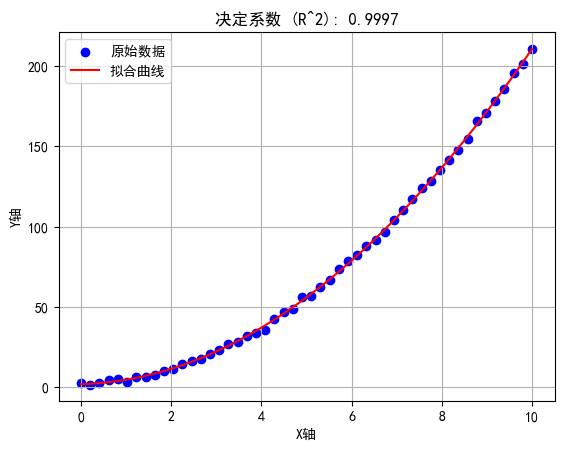

(array([2.00921811, 0.76665669, 1.99687025]),
 array([0.01963179, 0.20300684, 0.43894856]),
 0.9997289710931474)

In [12]:
# 定义非线性模型
def my_model(x, a, b, c):
    return a * x**2 + b * x + c

# 创建模拟数据
np.random.seed(0)
x_data = np.linspace(0, 10, 50)
y_data = 2 * x_data**2 + 1 * x_data + 1 + np.random.normal(0, 1, 50)

# 使用curve_fit进行非线性拟合
params, covmatrix = curve_fit(my_model, x_data, y_data,p0=(2.4,1.1,1))

# 提取拟合参数

std = np.sqrt(np.diag(covmatrix))

# 计算拟合值
y_fit = my_model(x_data,*params )

# 计算总平方和（Total Sum of Squares，TSS）
y_mean = np.mean(y_data)
tss = np.sum((y_data - y_mean)**2)

# 计算残差平方和（Residual Sum of Squares，RSS）
rss = np.sum((y_data - y_fit)**2)

# 计算决定系数 R^2
r_squared = 1 - (rss / tss)

# 结果报道
for i in range(params.shape[0]):
    print(f'第{i}个参数的结果为:{string_result(params[i],std[i],latex=True)}')

print(f"决定系数R^2为:{r_squared}")



# 可视化拟合过程
plt.figure()
plt.scatter(x_data, y_data, label='原始数据', color='b')

max_value = np.max(x_data)
min_value = np.min(x_data)
linspace_xdata = np.linspace(min_value, max_value, 1000)

#如果是np可接受的函数会方便很多，这里考虑一般情况
linspace_ydata=[]
for v in linspace_xdata:
    linspace_ydata.append(my_model(v,*params))

linspace_ydata=np.array(linspace_ydata)

plt.plot(linspace_xdata, linspace_ydata, label='拟合曲线', color='r')
plt.xlabel('X轴')
plt.ylabel('Y轴')
plt.legend()
plt.grid()
plt.title(f"决定系数 (R^2): {r_squared:.{int(1-np.log10(1-r_squared))}f}")
plt.show()


params,std,r_squared



# 带误差拟合

第0个参数的结果为:$( 1.962\pm0.005 )\times 10^0.0$
第1个参数的结果为:$( 1.26\pm0.05 )\times 10^0.0$
第2个参数的结果为:$( 1.31\pm0.11 )\times 10^0.0$
决定系数R^2为:0.9996614509994879


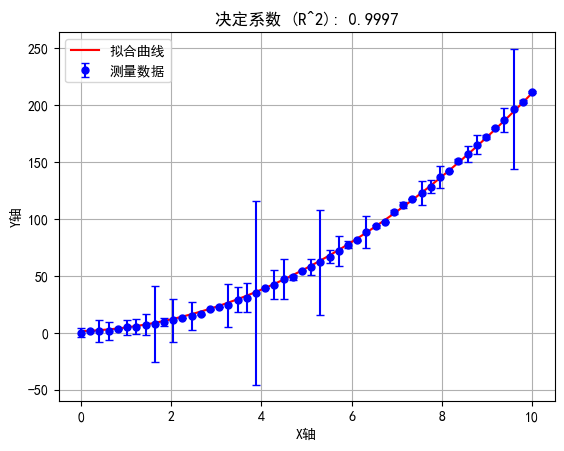

(array([1.96230463, 1.26152468, 1.30583168]),
 array([0.00530774, 0.04762613, 0.11008312]),
 0.9996614509994879)

In [7]:
# 定义非线性模型
def my_model(x, a, b, c):
    return a * x**2 + b * x + c

# 创建模拟数据
# np.random.seed(0)
x_data = np.linspace(0, 10, 50)
y_data = 2 * x_data**2 + 1 * x_data + 1 + np.random.normal(0, 1, 50)
y_error = np.random.chisquare(1, 50)*10

# 使用curve_fit进行非线性拟合
params, covmatrix = curve_fit(my_model, x_data, y_data,sigma=y_error)

# 提取拟合参数

std = np.sqrt(np.diag(covmatrix))

# 计算拟合值
y_fit = my_model(x_data,*params )

# 计算总平方和（Total Sum of Squares，TSS）
y_mean = np.mean(y_data)
tss = np.sum((y_data - y_mean)**2)

# 计算残差平方和（Residual Sum of Squares，RSS）
rss = np.sum((y_data - y_fit)**2)

# 计算决定系数 R^2
r_squared = 1 - (rss / tss)

# 结果报道
for i in range(params.shape[0]):
    print(f'第{i}个参数的结果为:{string_result(params[i],std[i],latex=True)}')

print(f"决定系数R^2为:{r_squared}")



# 可视化拟合过程
plt.figure()
plt.errorbar(x_data, y_data, yerr=y_error, fmt='bo', markersize=5, capsize=3, capthick=1, label='测量数据')

max_value = np.max(x_data)
min_value = np.min(x_data)
linspace_xdata = np.linspace(min_value, max_value, 1000)

#如果是np可接受的函数会方便很多，这里考虑一般情况
linspace_ydata=[]
for v in linspace_xdata:
    linspace_ydata.append(my_model(v,*params))

linspace_ydata=np.array(linspace_ydata)

plt.plot(linspace_xdata, linspace_ydata, label='拟合曲线', color='r')
plt.xlabel('X轴')
plt.ylabel('Y轴')
plt.legend()
plt.grid()
plt.title(f"决定系数 (R^2): {r_squared:.{int(1-np.log10(1-r_squared))}f}")
plt.show()


params,std,r_squared

